# **Pre-Processing**

In [ ]:
import pandas as pd
import nltk
import time
import numpy as np
import re
import string, unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize

In [ ]:
Data_tweet = pd.read_excel('Data.xlsx', names=['waktu', 'id', 'username', 'teks'])

## **Case Folding**

In [ ]:
Data_tweet['tweet_casefolding'] = Data_tweet['teks'].str.lower()

## **Cleansing**

In [ ]:
import string
import re #regex
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


def remove_special_char(text):
    # remove tab, new line, and back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, and hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL and word
    return text.replace("http://", " ").replace("https://", " ").replace("xe","").replace("xa","").replace("xf","")
Data_tweet['tweet_cleansing'] = Data_tweet['tweet_casefolding'].apply(remove_special_char)

#remove angka
def remove_number(text):
    return  re.sub(r"\d+", " ", text)
Data_tweet['tweet_cleansing'] = Data_tweet['tweet_cleansing'].apply(remove_number)

#remove tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans(" "," ",string.punctuation))
Data_tweet['tweet_cleansing'] = Data_tweet['tweet_cleansing'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()
Data_tweet['tweet_cleansing'] = Data_tweet['tweet_cleansing'].apply(remove_whitespace_LT)

# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
Data_tweet['tweet_cleansing'] = Data_tweet['tweet_cleansing'].apply(remove_single_char)

#remove double spasi
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
Data_tweet['tweet_cleansing'] = Data_tweet['tweet_cleansing'].apply(remove_whitespace_multiple)

## **Tokenizing**

In [ ]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

Data_tweet['tweet_token'] = Data_tweet['tweet_cleansing'].apply(word_tokenize_wrapper)

## **Stopword**

In [ ]:
from nltk.corpus import stopwords


# stopword indonesia
list_stopwords = stopwords.words('indonesian')

# stopword tambahan
list_stopwords.extend(['yg', 'dg', 'dgn', 'brt', 'ppp', 'ny', 'klo', 'ttg', 'dan', 'di',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 'tn', 'lrt', 'mrt',
                       'krn', 'nya', 'nih', 'sih', 'wkwk', 'saja', 'xi', 'folks', 'yang',
                       'si', 'tuh', 'utk', 'ya', 'fgnjf', 'nge', 'th', 'ktt', 'askrl',
                       'jd', 'sdh', 'aja', 'n', 'pt', 'kai', 'kci', 'krl', 'yuks', 'ini',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'lo', 'anjir', 'nauzubillah',
                       '&amp', 'yah', 'yang', 'gini', 'yha', 'sjw', 'ppid', 'ppatk',
                       'sm', 'scr', 'also', 'ku', 'mu', 'dri', 'wah', 'ewg',
                       'gue', 'apa', 'ape', 'bgstt', 'ri', 'bp'])

# read stopword dari file
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string ke list & append stopword tambahan
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

Data_tweet['tweet_stopword'] = Data_tweet['tweet_token'].apply(stopwords_removal)

print(Data_tweet['tweet_stopword'].head(30))

0     [bangku, transportasi, pioritas, hamil, lansia...
1     [tenaga, harian, lepas, thl, pemda, terdaftar,...
2     [berita, terpopuler, lady, boss, mengenal, apl...
3     [kerjasama, negara, sajasaya, difabel, tuna, r...
4     [regsosek, pendataan, kondisi, sosial, ekonomi...
5     [gais, telkom, indonesia, yayasan, pendidikan,...
6     [telkom, indonesia, yayasan, pendidikan, telko...
7     [mantap, banget, smk, telkom, menggelar, pelat...
8     [terbaik, banget, penyandang, disabilitas, dib...
9     [gaistelkom, indonesia, yayasan, pendidikan, t...
10    [smk, telkom, sidoarjo, pelatihan, teknologi, ...
11    [pastinya, niih, telkom, indonesia, yayasan, p...
12    [smk, telkom, sidoarjo, pelatihan, teknologi, ...
13    [tata, memperoleh, informasi, penyandang, disa...
14    [sobat, hadi, fitur, layanan, inklusi, portal,...
15    [sahabat, polres, pati, baerbagi, informasi, p...
16    [sahabat, polres, pati, baerbagi, informasi, p...
17    [sahabat, polres, pati, baerbagi, informas

## **Normalization**

In [ ]:
normalizad_word = pd.read_csv("normalisasi.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

Data_tweet['tweet_normalization'] = Data_tweet['tweet_stopword'].apply(normalized_term)

Data_tweet['tweet_normalization'].head(100)

0     [bangku, transportasi, prioritas, hamil, lansi...
1     [tenaga, harian, lepas, tanggal, pemda, terdaf...
2     [berita, terpopuler, lady, boss, mengenal, apl...
3     [kerja sama, negara, saja saya, difabel, tuna,...
4     [regsosek, pendataan, kondisi, sosial, ekonomi...
                            ...                        
95    [isu, dibahas, penciptaan, lapangan, kesempata...
96    [pertemuan, keenam, kelompok, tenaga kerja, em...
97    [indonesia, senantiasa, mengambil, peran, mewu...
98    [sumatera, selatan, indonesia, kampanyekan, du...
99    [pemantauan, implementasi, integrasi, penyanda...
Name: tweet_normalization, Length: 100, dtype: object

## **Stemming**

In [ ]:
pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 4.0 MB/s 


In [ ]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 3.7 MB/s 
     |████████████████████████████████| 280 kB 53.1 MB/s 
     |████████████████████████████████| 1.6 MB 42.6 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=badb5429511673e366719a2ae6d16cde987a8567db6a153859476f7ae5788747
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in Data_tweet['tweet_normalization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

Data_tweet['tweet_stemming'] = Data_tweet['tweet_normalization'].swifter.apply(get_stemmed_term)
print(Data_tweet['tweet_stemming'])

3800
------------------------
bangku : bangku
transportasi : transportasi
prioritas : prioritas
hamil : hamil
lansia : lansia
sakit : sakit
difabel : difabel
kadang : kadang
tidak : tidak
empati : empati
jam : jam
pulang : pulang
pura : pura
tidur : tidur
mengaku : aku
tenaga : tenaga
harian : hari
lepas : lepas
tanggal : tanggal
pemda : pemda
terdaftar : daftar
bpjs : bpjs
bansos : bansos
ojek : ojek
pangkalan : pangkal
nelayan : nelayan
yatim : yatim
piatu : piatu
korban : korban
covid : covid
terlantar : lantar
penyelenggaraan : selenggara
jasa : jasa
layanan : layan
keagamaan : agama
berita : berita
terpopuler : populer
lady : lady
boss : boss
mengenal : kenal
aplikasi : aplikasi
tedi : tedi
counter : counter
menawarkan : tawar
dunia : dunia
kerja sama : kerja sama
negara : negara
saja saya : saja saya
tuna : tuna
rungu : rungu
berminat : minat
ln : ln
regsosek : regsosek
pendataan : data
kondisi : kondisi
sosial : sosial
ekonomi : ekonomi
penduduk : duduk
demografi : demografi
per

Pandas Apply:   0%|          | 0/1209 [00:00<?, ?it/s]

0       [bangku, transportasi, prioritas, hamil, lansi...
1       [tenaga, hari, lepas, tanggal, pemda, daftar, ...
2       [berita, populer, lady, boss, kenal, aplikasi,...
3       [kerja sama, negara, saja saya, difabel, tuna,...
4       [regsosek, data, kondisi, sosial, ekonomi, dud...
                              ...                        
1204    [lambat, bagi, polres, kawasan, bandara, gusti...
1205    [lambat, bagi, polres, kawasan, bandara, gusti...
1206    [polres, kawasan, bandara, gusti, ngurah, rai,...
1207    [polres, kawasan, bandara, gusti, ngurah, rai,...
1208    [tadi, starbucks, kasir, tuli, kemarin, burger...
Name: tweet_stemming, Length: 1209, dtype: object


In [ ]:
Data_tweet['clean_data'] = Data_tweet['tweet_stemming']

for i, token in enumerate(Data_tweet['clean_data']):
    (Data_tweet['clean_data'][i]) = ' '.join(token)

Data_tweet['clean_data'] = Data_tweet['clean_data']
Data_tweet.head(10)

<ipython-input-15-ce301763186a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (Data_tweet['clean_data'][i]) = ' '.join(token)


,waktu,id,username,teks,tweet_casefolding,tweet_cleansing,tweet_token,tweet_stopword,tweet_normalization,tweet_stemming,clean_data
0,########,1.570000e+18,kusumaelisa,Semua bangku di transportasi umum itu untuk pi...,semua bangku di transportasi umum itu untuk pi...,semua bangku di transportasi umum itu untuk pi...,"[semua, bangku, di, transportasi, umum, itu, u...","[bangku, transportasi, pioritas, hamil, lansia...","[bangku, transportasi, prioritas, hamil, lansi...","[bangku, transportasi, prioritas, hamil, lansi...",bangku transportasi prioritas hamil lansia sak...
1,########,1.570000e+18,Pemerintah Kabupaten Bekasi,"Tenaga Harian Lepas (THL) Pemda, yang belum te...","tenaga harian lepas (thl) pemda, yang belum te...",tenaga harian lepas thl pemda yang belum terda...,"[tenaga, harian, lepas, thl, pemda, yang, belu...","[tenaga, harian, lepas, thl, pemda, terdaftar,...","[tenaga, harian, lepas, tanggal, pemda, terdaf...","[tenaga, hari, lepas, tanggal, pemda, daftar, ...",tenaga hari lepas tanggal pemda daftar bpjs te...
2,########,1.570000e+18,Cerita Parapuan,BERITA TERPOPULER LADY BOSS Mengenal Aplikasi ...,berita terpopuler lady boss mengenal aplikasi ...,berita terpopuler lady boss mengenal aplikasi ...,"[berita, terpopuler, lady, boss, mengenal, apl...","[berita, terpopuler, lady, boss, mengenal, apl...","[berita, terpopuler, lady, boss, mengenal, apl...","[berita, populer, lady, boss, kenal, aplikasi,...",berita populer lady boss kenal aplikasi tedi d...
3,########,1.570000e+18,milancool,@bp2mi_ri bp2mi kerjasama dgn negara mana saja...,@bp2mi_ri bp2mi kerjasama dgn negara mana saja...,ri bp mi kerjasama dgn negara mana sajasaya di...,"[ri, bp, mi, kerjasama, dgn, negara, mana, saj...","[kerjasama, negara, sajasaya, difabel, tuna, r...","[kerja sama, negara, saja saya, difabel, tuna,...","[kerja sama, negara, saja saya, difabel, tuna,...",kerja sama negara saja saya difabel tuna rungu...
4,########,1.570000e+18,Dwi Prasetyo,Regsosek merupakan pendataan kondisi sosial ek...,regsosek merupakan pendataan kondisi sosial ek...,regsosek merupakan pendataan kondisi sosial ek...,"[regsosek, merupakan, pendataan, kondisi, sosi...","[regsosek, pendataan, kondisi, sosial, ekonomi...","[regsosek, pendataan, kondisi, sosial, ekonomi...","[regsosek, data, kondisi, sosial, ekonomi, dud...",regsosek data kondisi sosial ekonomi duduk dem...
5,########,1.570000e+18,Keila Anjana,nah gais dengan Telkom Indonesia bersama Yayas...,nah gais dengan telkom indonesia bersama yayas...,nah gais dengan telkom indonesia bersama yayas...,"[nah, gais, dengan, telkom, indonesia, bersama...","[gais, telkom, indonesia, yayasan, pendidikan,...","[gais, telkom, indonesia, yayasan, pendidikan,...","[gais, telkom, indonesia, yayasan, didik, telk...",gais telkom indonesia yayasan didik telkom har...
6,########,1.570000e+18,Keila Anjana,Telkom Indonesia bersama Yayasan Pendidikan Te...,telkom indonesia bersama yayasan pendidikan te...,telkom indonesia bersama yayasan pendidikan te...,"[telkom, indonesia, bersama, yayasan, pendidik...","[telkom, indonesia, yayasan, pendidikan, telko...","[telkom, indonesia, yayasan, pendidikan, telko...","[telkom, indonesia, yayasan, didik, telkom, in...",telkom indonesia yayasan didik telkom inisiasi...
7,########,1.570000e+18,Sisda Amalia,"mantap banget dahh, SMK Telkom menggelar pelat...","mantap banget dahh, smk telkom menggelar pelat...",mantap banget dahh smk telkom menggelar pelati...,"[mantap, banget, dahh, smk, telkom, menggelar,...","[mantap, banget, smk, telkom, menggelar, pelat...","[mantap, banget, smk, telkom, menggelar, pelat...","[mantap, banget, smk, telkom, gelar, latih, te...",mantap banget smk telkom gelar latih teknologi...
8,########,1.570000e+18,Annisa Amatila,"TErbaik banget nih, Penyandang disabilitas dib...","terbaik banget nih, penyandang disabilitas dib...",terbaik banget nih penyandang disabilitas dibe...,"[terbaik, banget, nih, penyandang, disabilitas...","[terbaik, banget, penyandang, disabilitas

# **Ekstraksi Fitur**

## **Lexicon**

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)
import csv
import pandas as pd

# Loads lexicon positive and negative data
lexicon_positive = pd.read_csv('positive.csv')
lexicon_negative = pd.read_csv('negative.csv')

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        try:
          score = score + lexicon_positive.loc[lexicon_positive['word'] == word]['weight'].iloc[0]
        except:
          pass
        if (word in lexicon_positive['word']):
            score = score + lexicon_positive[word]
    for word in text:
        try:
          score = score + lexicon_negative.loc[lexicon_negative['word'] == word]['weight'].iloc[0]
        except:
          pass
        if (word in lexicon_negative['word']):
            score = score + lexicon_negative[word]

    polarity=''
    if (score >= 0):
        polarity = 'positive'
    else :
        polarity = 'negative'

    return score, polarity

In [ ]:
results = Data_tweet['tweet_stemming'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
Data_tweet['polarity_score'] = results[0]
Data_tweet['polarity'] = results[1]
print(Data_tweet['polarity'].value_counts())

positive    776
negative    433
Name: polarity, dtype: int64


In [ ]:
Data_tweet['polarity'] = np.where(Data_tweet['polarity'] == 'positive', 1, 0) # positif = 1

In [ ]:
Data_tweet.head(10)

,waktu,id,username,teks,tweet_casefolding,tweet_cleansing,tweet_token,tweet_stopword,tweet_normalization,tweet_stemming,clean_data,polarity_score,polarity
0,########,1.570000e+18,kusumaelisa,Semua bangku di transportasi umum itu untuk pi...,semua bangku di transportasi umum itu untuk pi...,semua bangku di transportasi umum itu untuk pi...,"[semua, bangku, di, transportasi, umum, itu, u...","[bangku, transportasi, pioritas, hamil, lansia...","[bangku, transportasi, prioritas, hamil, lansi...","[bangku, transportasi, prioritas, hamil, lansi...",bangku transportasi prioritas hamil lansia sak...,-9,0
1,########,1.570000e+18,Pemerintah Kabupaten Bekasi,"Tenaga Harian Lepas (THL) Pemda, yang belum te...","tenaga harian lepas (thl) pemda, yang belum te...",tenaga harian lepas thl pemda yang belum terda...,"[tenaga, harian, lepas, thl, pemda, yang, belu...","[tenaga, harian, lepas, thl, pemda, terdaftar,...","[tenaga, harian, lepas, tanggal, pemda, terdaf...","[tenaga, hari, lepas, tanggal, pemda, daftar, ...",tenaga hari lepas tanggal pemda daftar bpjs te...,7,1
2,########,1.570000e+18,Cerita Parapuan,BERITA TERPOPULER LADY BOSS Mengenal Aplikasi ...,berita terpopuler lady boss mengenal aplikasi ...,berita terpopuler lady boss mengenal aplikasi ...,"[berita, terpopuler, lady, boss, mengenal, apl...","[berita, terpopuler, lady, boss, mengenal, apl...","[berita, terpopuler, lady, boss, mengenal, apl...","[berita, populer, lady, boss, kenal, aplikasi,...",berita populer lady boss kenal aplikasi tedi d...,5,1
3,########,1.570000e+18,milancool,@bp2mi_ri bp2mi kerjasama dgn negara mana saja...,@bp2mi_ri bp2mi kerjasama dgn negara mana saja...,ri bp mi kerjasama dgn negara mana sajasaya di...,"[ri, bp, mi, kerjasama, dgn, negara, mana, saj...","[kerjasama, negara, sajasaya, difabel, tuna, r...","[kerja sama, negara, saja saya, difabel, tuna,...","[kerja sama, negara, saja saya, difabel, tuna,...",kerja sama negara saja saya difabel tuna rungu...,8,1
4,########,1.570000e+18,Dwi Prasetyo,Regsosek merupakan pendataan kondisi sosial ek...,regsosek merupakan pendataan kondisi sosial ek...,regsosek merupakan pendataan kondisi sosial ek...,"[regsosek, merupakan, pendataan, kondisi, sosi...","[regsosek, pendataan, kondisi, sosial, ekonomi...","[regsosek, pendataan, kondisi, sosial, ekonomi...","[regsosek, data, kondisi, sosial, ekonomi, dud...",regsosek data kondisi sosial ekonomi duduk dem...,1,1
5,########,1.570000e+18,Keila Anjana,nah gais dengan Telkom Indonesia bersama Yayas...,nah gais dengan telkom indonesia bersama yayas...,nah gais dengan telkom indonesia bersama yayas...,"[nah, gais, dengan, telkom, indonesia, bersama...","[gais, telkom, indonesia, yayasan, pendidikan,...","[gais, telkom, indonesia, yayasan, pendidikan,...","[gais, telkom, indonesia, yayasan, didik, telk...",gais telkom indonesia yayasan didik telkom har...,6,1
6,########,1.570000e+18,Keila Anjana,Telkom Indonesia bersama Yayasan Pendidikan Te...,telkom indonesia bersama yayasan pendidikan te...,telkom indonesia bersama yayasan pendidikan te...,"[telkom, indonesia, bersama, yayasan, pendidik...","[telkom, indonesia, yayasan, pendidikan, telko...","[telkom, indonesia, yayasan, pendidikan, telko...","[telkom, indonesia, yayasan, didik, telkom, in...",telkom indonesia yayasan didik telkom inisiasi...,6,1
7,########,1.570000e+18,Sisda Amalia,"mantap banget dahh, SMK Telkom menggelar pelat...","mantap banget dahh, smk telkom menggelar pelat...",mantap banget dahh smk telkom menggelar pelati...,"[mantap, banget, dahh, smk, telkom, menggelar,...","[mantap, banget, smk, telkom, menggelar, pelat...","[mantap, banget, smk, telkom, menggelar, pelat...","[mantap, banget, smk, telkom, gelar, latih, te...",mantap banget smk telkom gelar latih teknologi...,8,1
8,########,1.570000e+18,Annisa Amatila,"TErbaik banget nih, Penyandang disabilitas dib...","terbaik banget nih, penyandang disabilitas dib...",terbaik banget nih penyandang disabilitas dibe...,"[terbaik, banget, nih, penyandang, d

1    776
0    433
Name: polarity, dtype: int64


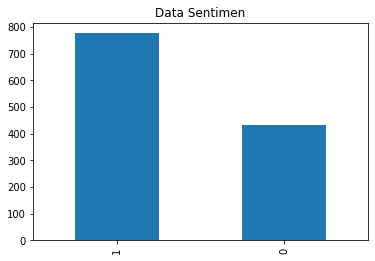

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pd.value_counts(Data_tweet['polarity']).plot.bar(title='Data Sentimen')
print(pd.value_counts(Data_tweet['polarity']))

Text(0.5, 0, 'sentiment')

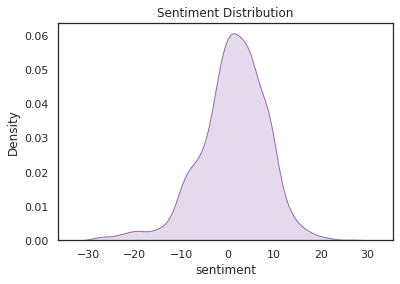

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(Data_tweet['polarity_score'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

In [ ]:
Data_tweet.to_csv('Data_readyLEX_R4.csv', index=False)

In [ ]:
import csv
import pandas as pd
Data_tweet = pd.read_csv('Data_readyLEX_R4.csv')

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(all_words):
    global WorldCloud
    wordcloud = WordCloud(width=800, height=500, random_state=1, collocations=False,
                          colormap='Set2', background_color='white').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

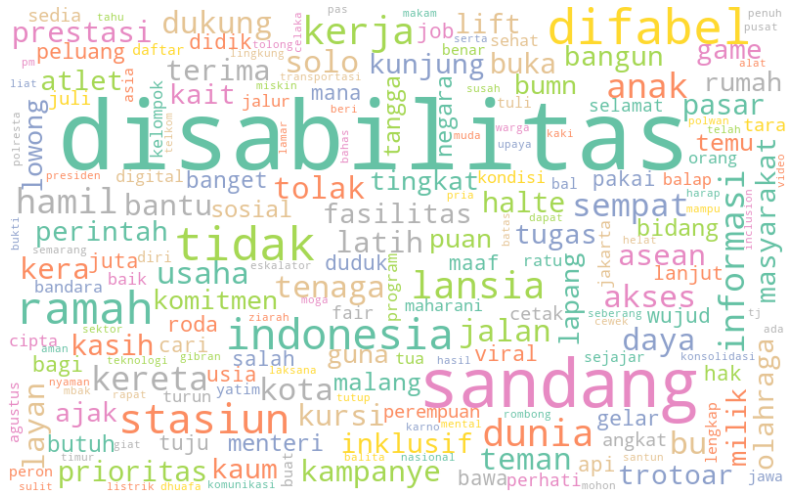

In [ ]:
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in Data_tweet['clean_data']])
generate_wordcloud(all_words)

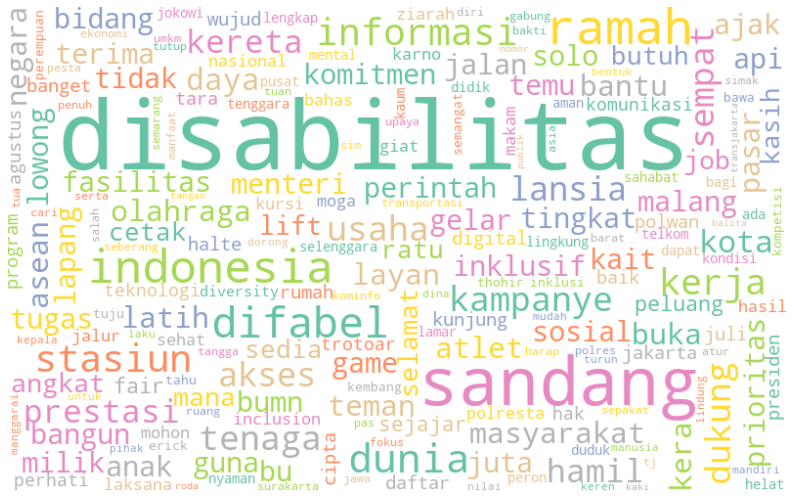

In [ ]:
positif = [text for text in Data_tweet['clean_data'][Data_tweet['polarity']==1]]
all_words_positif = ' '.join(positif)
generate_wordcloud(all_words_positif)

disabilitas    770
sandang        299
ramah          139
indonesia      124
difabel        106
dunia           93
stasiun         84
informasi       80
kerja           76
usaha           67
dtype: int64


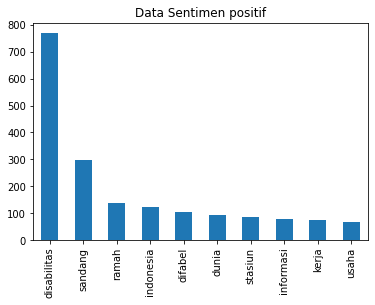

In [ ]:
from sklearn.decomposition import PCA

all_words_positif_2 = all_words_positif.split(" ")
pd.value_counts(all_words_positif_2).head(10).plot.bar(title='Data Sentimen positif')
print(pd.value_counts(all_words_positif_2).head(10))

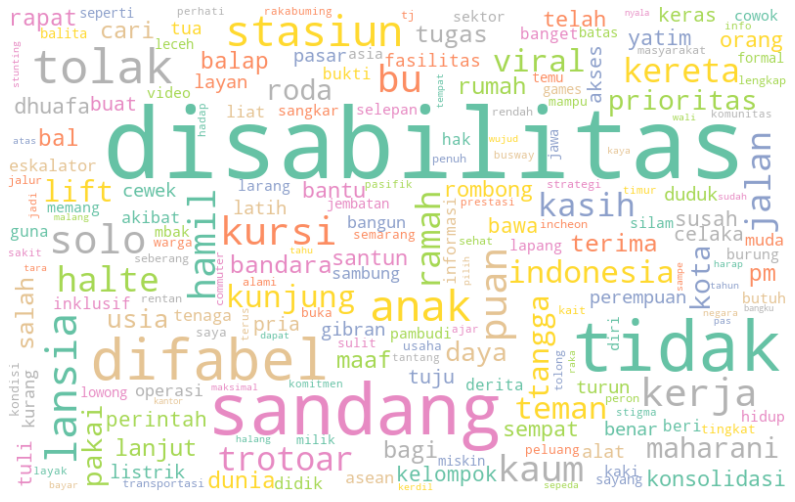

In [ ]:
negatif = [text for text in Data_tweet['clean_data'][Data_tweet['polarity']==0]]
all_words_negatif = ' '.join(negatif)
generate_wordcloud(all_words_negatif)

disabilitas    370
sandang        163
tidak          157
difabel        101
tolak           70
stasiun         57
anak            56
lansia          53
solo            47
kerja           45
dtype: int64


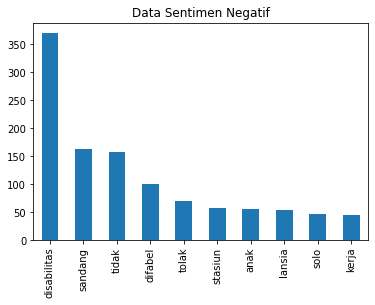

In [ ]:
all_words_negatif_2 = all_words_negatif.split(" ")
pd.value_counts(all_words_negatif_2).head(10).plot.bar(title='Data Sentimen Negatif')
print(pd.value_counts(all_words_negatif_2).head(10))

## **TfIdf Vectorizer**

In [ ]:
import csv
import pandas as pd

Data = pd.read_csv('Data_readyLEX_R4.csv') #read the CSV file
tweet = Data['tweet_stemming']
sentimen = Data['polarity']
Data

,waktu,id,username,teks,tweet_casefolding,tweet_cleansing,tweet_token,tweet_stopword,tweet_normalization,tweet_stemming,clean_data,polarity_score,polarity
0,########,1.570000e+18,kusumaelisa,Semua bangku di transportasi umum itu untuk pi...,semua bangku di transportasi umum itu untuk pi...,semua bangku di transportasi umum itu untuk pi...,"['semua', 'bangku', 'di', 'transportasi', 'umu...","['bangku', 'transportasi', 'pioritas', 'hamil'...","['bangku', 'transportasi', 'prioritas', 'hamil...","['bangku', 'transportasi', 'prioritas', 'hamil...",bangku transportasi prioritas hamil lansia sak...,-9,0
1,########,1.570000e+18,Pemerintah Kabupaten Bekasi,"Tenaga Harian Lepas (THL) Pemda, yang belum te...","tenaga harian lepas (thl) pemda, yang belum te...",tenaga harian lepas thl pemda yang belum terda...,"['tenaga', 'harian', 'lepas', 'thl', 'pemda', ...","['tenaga', 'harian', 'lepas', 'thl', 'pemda', ...","['tenaga', 'harian', 'lepas', 'tanggal', 'pemd...","['tenaga', 'hari', 'lepas', 'tanggal', 'pemda'...",tenaga hari lepas tanggal pemda daftar bpjs te...,7,1
2,########,1.570000e+18,Cerita Parapuan,BERITA TERPOPULER LADY BOSS Mengenal Aplikasi ...,berita terpopuler lady boss mengenal aplikasi ...,berita terpopuler lady boss mengenal aplikasi ...,"['berita', 'terpopuler', 'lady', 'boss', 'meng...","['berita', 'terpopuler', 'lady', 'boss', 'meng...","['berita', 'terpopuler', 'lady', 'boss', 'meng...","['berita', 'populer', 'lady', 'boss', 'kenal',...",berita populer lady boss kenal aplikasi tedi d...,5,1
3,########,1.570000e+18,milancool,@bp2mi_ri bp2mi kerjasama dgn negara mana saja...,@bp2mi_ri bp2mi kerjasama dgn negara mana saja...,ri bp mi kerjasama dgn negara mana sajasaya di...,"['ri', 'bp', 'mi', 'kerjasama', 'dgn', 'negara...","['kerjasama', 'negara', 'sajasaya', 'difabel',...","['kerja sama', 'negara', 'saja saya', 'difabel...","['kerja sama', 'negara', 'saja saya', 'difabel...",kerja sama negara saja saya difabel tuna rungu...,8,1
4,########,1.570000e+18,Dwi Prasetyo,Regsosek merupakan pendataan kondisi sosial ek...,regsosek merupakan pendataan kondisi sosial ek...,regsosek merupakan pendataan kondisi sosial ek...,"['regsosek', 'merupakan', 'pendataan', 'kondis...","['regsosek', 'pendataan', 'kondisi', 'sosial',...","['regsosek', 'pendataan', 'kondisi', 'sosial',...","['regsosek', 'data', 'kondisi', 'sosial', 'eko...",regsosek data kondisi sosial ekonomi duduk dem...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,########,1.580000e+18,Polres Bandara Ngr Rai,Tidak ada kata terlambat untuk berbagi dengan ...,tidak ada kata terlambat untuk berbagi dengan ...,tidak ada kata terlambat untuk berbagi dengan ...,"['tidak', 'ada', 'kata', 'terlambat', 'untuk',...","['terlambat', 'berbagi', 'polres', 'kawasan', ...","['terlambat', 'berbagi', 'polres', 'kawasan', ...","['lambat', 'bagi', 'polres', 'kawasan', 'banda...",lambat bagi polres kawasan bandara gusti ngura...,10,1
1205,########,1.580000e+18,HumasRes Bandara IGN Rai,Tidak ada kata terlambat untuk berbagi dengan ...,tidak ada kata terlambat untuk berbagi dengan ...,tidak ada kata terlambat untuk berbagi dengan ...,"['tidak', 'ada', 'kata', 'terlambat', 'untuk',...","['terlambat', 'berbagi', 'polres', 'kawasan', ...","['terlambat', 'berbagi', 'polres', 'kawasan', ...","['lambat', 'bagi', 'polres', 'kawasan', 'banda...",lambat bagi polres kawasan bandara gusti ngura...,10,1
1206,########,1.580000e+18,Polres Bandara Ngr Rai,#polresbandarapeduli \nPolres Kawasan Bandara ...,#polresbandarapeduli \npolres kawasan bandara ...,polres kawasan bandara gusti ngurah rai kembal...,"['polres', 'kawasan', 'bandara', 'gusti', 'ngu...","['polres', 'kawasan', 'bandara', 'gusti', 'ngu...","['polres', 'kawasan', 'bandara', 'gusti', 'ngu...","['polres', 'kawasan', 'bandara', 'gusti', 'ngu...",polres kawasan bandara gusti ngurah rai salur ...,8,1
1207,########,1.580000e+18,HumasRes Bandara IGN Rai,#polresbandarapeduli \nPolres Kawasan Bandara ...,#polresbandarapeduli \npolres kaw

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan,
# di pilih berdasarkan top max_features
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 2500

# Feature Engineering

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(tweet).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

TF-IDF  <class 'numpy.ndarray'> (1209, 2500)


In [ ]:
terms = tf_idf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False).head(20)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,rank
582,disabilitas,77.310154
1824,sandang,51.991741
1685,ramah,43.819848
625,dunia,38.756921
926,indonesia,38.004437
1032,kampanye,32.047878
565,difabel,30.319931
2045,stasiun,24.258676
2236,tidak,22.823823
1087,kerja,20.116086


# **Klasifikasi**

## **RBF**

In [ ]:
tfidf_gs = tf_idf.fit_transform(tweet)

In [ ]:
import numpy as np
from matplotlib.colors import Normalize

#cari titik tengah peta warna agar berada di sekitar nilai yang diinginkan
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
X = tfidf_gs
y = sentimen

In [ ]:
#untuk ambil data dr kolom X dan y
X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

In [ ]:
from sklearn.preprocessing import StandardScaler

#untuk scale data
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 7, 10)
gamma_range = np.logspace(-7, 2, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.3f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1000.0, 'gamma': 1e-06} with a score of 0.834


In [ ]:
df = pd.DataFrame(grid.cv_results_)
df.sort_values(by=['rank_test_score'], ascending = True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
51,0.161055,0.006264,0.016618,0.000527,1000.0,0.000001,"{'C': 1000.0, 'gamma': 1e-06}",0.809917,0.801653,0.801653,0.859504,0.909091,0.851240,0.851240,0.818182,0.809917,0.825000,0.833740,0.032352,1
60,0.160122,0.002960,0.016158,0.000288,10000.0,0.0,"{'C': 10000.0, 'gamma': 1e-07}",0.809917,0.801653,0.801653,0.859504,0.909091,0.851240,0.859504,0.801653,0.801653,0.833333,0.832920,0.034628,2
42,0.161141,0.005479,0.016476,0.000593,100.0,0.00001,"{'C': 100.0, 'gamma': 1e-05}",0.768595,0.793388,0.809917,0.842975,0.900826,0.859504,0.842975,0.834711,0.801653,0.808333,0.826288,0.035910,3
33,0.164060,0.002358,0.017370,0.000491,10.0,0.0001,"{'C': 10.0, 'gamma': 0.0001}",0.768595,0.785124,0.818182,0.834711,0.884298,0.842975,0.834711,0.834711,0.809917,0.833333,0.824656,0.030391,4
52,0.163497,0.008850,0.016525,0.001444,1000.0,0.00001,"{'C': 1000.0, 'gamma': 1e-05}",0.793388,0.826446,0.768595,0.834711,0.892562,0.826446,0.859504,0.826446,0.793388,0.808333,0.822982,0.033575,5
61,0.164540,0.005246,0.015450,0.000418,10000.0,0.000001,"{'C': 10000.0, 'gamma': 1e-06}",0.809917,0.818182,0.768595,0.851240,0.884298,0.826446,0.859504,0.809917,0.793388,0.783333,0.820482,0.034076,6
70,0.162719,0.003693,0.015280,0.000394,100000.0,0.0,"{'C': 100000.0, 'gamma': 1e-07}",0.801653,0.809917,0.760331,0.859504,0.900826,0.834711,0.842975,0.801653,0.793388,0.783333,0.818829,0.039003,7
43,0.162030,0.004182,0.016625,0.000475,100.0,0.0001,"{'C': 100.0, 'gamma': 0.0001}",0.801653,0.793388,0.768595,0.834711,0.892562,0.793388,0.842975,0.826446,0.809917,0.808333,0.817197,0.032566,8
62,0.161778,0.004137,0.015584,0.000861,10000.0,0.00001,"{'C': 10000.0, 'gamma': 1e-05}",0.776860,0.826446,0.768595,0.818182,0.900826,0.818182,0.834711,0.826446,0.793388,0.791667,0.815530,0.035572,9
82,0.159776,0.002888,0.015183,0.000433,1000000.0,0.00001,"{'C': 1000000.0, 'gamma': 1e-05}",0.776860,0.826446,0.768595,0.818182,0.900826,0.818182,0.834711,0.826446,0.793388,0.791667,0.815530,0.035572,9


In [ ]:
df = pd.DataFrame(grid.cv_results_)
df.sort_values(by=['rank_test_score'], ascending = False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.122104,0.003783,0.014718,0.000356,0.01,0.0,"{'C': 0.01, 'gamma': 1e-07}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
21,0.174311,0.003912,0.019685,0.001824,1.0,0.000001,"{'C': 1.0, 'gamma': 1e-06}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
22,0.173919,0.004067,0.018715,0.000824,1.0,0.00001,"{'C': 1.0, 'gamma': 1e-05}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
1,0.124814,0.005230,0.014533,0.000355,0.01,0.000001,"{'C': 0.01, 'gamma': 1e-06}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
30,0.175168,0.002863,0.019443,0.000821,10.0,0.0,"{'C': 10.0, 'gamma': 1e-07}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
31,0.176199,0.003671,0.018980,0.000346,10.0,0.000001,"{'C': 10.0, 'gamma': 1e-06}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
40,0.173279,0.003053,0.019600,0.001140,100.0,0.0,"{'C': 100.0, 'gamma': 1e-07}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
13,0.164138,0.003332,0.019170,0.001522,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
12,0.175352,0.003929,0.019880,0.001512,0.1,0.00001,"{'C': 0.1, 'gamma': 1e-05}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
11,0.149661,0.005782,0.016727,0.000788,0.1,0.000001,"{'C': 0.1, 'gamma': 1e-06}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81


In [ ]:
akurasi = pd.DataFrame(grid.cv_results_)
akurasi

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.122104,0.003783,0.014718,0.000356,0.01,0.0,"{'C': 0.01, 'gamma': 1e-07}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
1,0.124814,0.005230,0.014533,0.000355,0.01,0.000001,"{'C': 0.01, 'gamma': 1e-06}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
2,0.155034,0.006345,0.016814,0.001116,0.01,0.00001,"{'C': 0.01, 'gamma': 1e-05}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
3,0.171535,0.004612,0.017748,0.000233,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
4,0.161405,0.003442,0.020071,0.002960,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.636364,0.636364,0.636364,0.644628,0.644628,0.644628,0.644628,0.644628,0.644628,0.641667,0.641853,0.003696,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.161519,0.005655,0.018680,0.000725,10000000.0,0.01,"{'C': 10000000.0, 'gamma': 0.01}",0.694215,0.719008,0.727273,0.727273,0.719008,0.694215,0.702479,0.719008,0.685950,0.708333,0.709676,0.014054,34
96,0.173403,0.008531,0.019543,0.000479,10000000.0,0.1,"{'C': 10000000.0, 'gamma': 0.1}",0.685950,0.710744,0.719008,0.719008,0.710744,0.685950,0.702479,0.710744,0.694215,0.708333,0.704718,0.011620,42
97,0.157436,0.004271,0.018414,0.000444,10000000.0,1.0,"{'C': 10000000.0, 'gamma': 1.0}",0.685950,0.710744,0.719008,0.719008,0.710744,0.685950,0.702479,0.710744,0.694215,0.708333,0.704718,0.011620,42
98,0.161026,0.004905,0.019348,0.001275,10000000.0,10.0,"{'C': 10000000.0, 'gamma': 10.0}",0.685950,0.710744,0.719008,0.719008,0.710744,0.685950,0.702479,0.710744,0.694215,0.708333,0.704718,0.011620,42


In [ ]:
scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

In [ ]:
scores

array([[0.64185262, 0.64185262, 0.64185262, 0.64185262, 0.64185262,
        0.64185262, 0.64185262, 0.64185262, 0.64185262, 0.64185262],
       [0.64185262, 0.64185262, 0.64185262, 0.64185262, 0.66004821,
        0.66500689, 0.66500689, 0.66500689, 0.66500689, 0.66500689],
       [0.64185262, 0.64185262, 0.64185262, 0.69231405, 0.73614325,
        0.70802342, 0.70471763, 0.70471763, 0.70471763, 0.70471763],
       [0.64185262, 0.64185262, 0.75767218, 0.82465565, 0.7378168 ,
        0.70967631, 0.70471763, 0.70471763, 0.70471763, 0.70471763],
       [0.64185262, 0.75931818, 0.82628788, 0.81719697, 0.7378168 ,
        0.70967631, 0.70471763, 0.70471763, 0.70471763, 0.70471763],
       [0.74856749, 0.83373967, 0.82298209, 0.81390496, 0.7378168 ,
        0.70967631, 0.70471763, 0.70471763, 0.70471763, 0.70471763],
       [0.83292011, 0.82048209, 0.8155303 , 0.81390496, 0.7378168 ,
        0.70967631, 0.70471763, 0.70471763, 0.70471763, 0.70471763],
       [0.8188292 , 0.81386364, 0.8155303

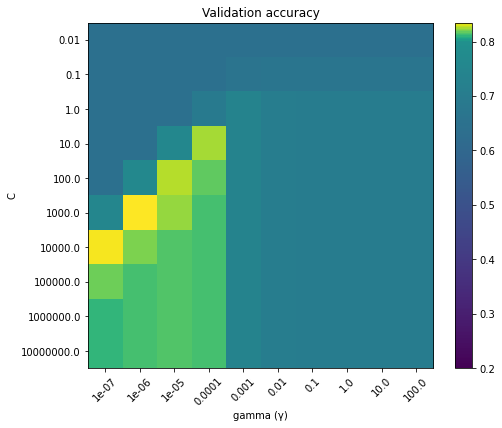

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    norm=MidpointNormalize(vmin=0.2, midpoint=0.8),
)
plt.text
plt.xlabel("gamma (γ)")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

In [ ]:
aDatas = scores


for i, aData in enumerate(aDatas):
  for j,  bData in enumerate(aData):
    aDatas[i][j] = round(bData * 100, 2)

aDatas

array([[64.19, 64.19, 64.19, 64.19, 64.19, 64.19, 64.19, 64.19, 64.19,
        64.19],
       [64.19, 64.19, 64.19, 64.19, 66.  , 66.5 , 66.5 , 66.5 , 66.5 ,
        66.5 ],
       [64.19, 64.19, 64.19, 69.23, 73.61, 70.8 , 70.47, 70.47, 70.47,
        70.47],
       [64.19, 64.19, 75.77, 82.47, 73.78, 70.97, 70.47, 70.47, 70.47,
        70.47],
       [64.19, 75.93, 82.63, 81.72, 73.78, 70.97, 70.47, 70.47, 70.47,
        70.47],
       [74.86, 83.37, 82.3 , 81.39, 73.78, 70.97, 70.47, 70.47, 70.47,
        70.47],
       [83.29, 82.05, 81.55, 81.39, 73.78, 70.97, 70.47, 70.47, 70.47,
        70.47],
       [81.88, 81.39, 81.55, 81.39, 73.78, 70.97, 70.47, 70.47, 70.47,
        70.47],
       [81.06, 81.39, 81.55, 81.39, 73.78, 70.97, 70.47, 70.47, 70.47,
        70.47],
       [81.06, 81.39, 81.55, 81.39, 73.78, 70.97, 70.47, 70.47, 70.47,
        70.47]])

## **Evaluasi Model**

In [ ]:
from statistics import mean, stdev
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create classifier object.
clasfc = svm.SVC(C=1000, gamma=0.000001, kernel='rbf')

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)
lst_accu_stratified = []
lst_prec_stratified = []
lst_recall_stratified = []
lst_f1_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clasfc.fit(x_train_fold, y_train_fold)
    y_pred = clasfc.predict(x_test_fold)
    acc = accuracy_score(y_test_fold, y_pred)
    prec = precision_score(y_test_fold, y_pred)
    rec = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    lst_accu_stratified.append(acc)
    lst_prec_stratified.append(prec)
    lst_recall_stratified.append(rec)
    lst_f1_stratified.append(f1)

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('List of possible precision:', lst_prec_stratified)
print('List of possible recall:', lst_recall_stratified)
print('List of possible f1-score:', lst_f1_stratified)

print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('Overall Precision:', mean(lst_prec_stratified)*100, '%')
print('Overall Recall:', mean(lst_recall_stratified)*100, '%')
print('Overall f1-score:', mean(lst_f1_stratified)*100, '%')


List of possible accuracy: [0.8099173553719008, 0.8016528925619835, 0.8016528925619835, 0.859504132231405, 0.9090909090909091, 0.8512396694214877, 0.8512396694214877, 0.8181818181818182, 0.8099173553719008, 0.825]
List of possible precision: [0.8214285714285714, 0.8045977011494253, 0.8192771084337349, 0.8674698795180723, 0.9036144578313253, 0.8658536585365854, 0.8488372093023255, 0.8333333333333334, 0.8235294117647058, 0.85]
List of possible recall: [0.8961038961038961, 0.9090909090909091, 0.8831168831168831, 0.9230769230769231, 0.9615384615384616, 0.9102564102564102, 0.9358974358974359, 0.8974358974358975, 0.8974358974358975, 0.8831168831168831]
List of possible f1-score: [0.8571428571428571, 0.8536585365853658, 0.85, 0.8944099378881989, 0.9316770186335404, 0.8875000000000001, 0.8902439024390244, 0.8641975308641975, 0.8588957055214724, 0.8662420382165604]

Overall Accuracy: 83.37396694214875 %
Overall Precision: 84.37941331298079 %
Overall Recall: 90.97069597069597 %
Overall f1-score: